# Analysing Indicators for Heavy Traffic on I-94

In this project we will analyse the dataset of the traffic on the American Highway I-94, understanding which factors are the most influential for heavy traffic in this highway.

The dataset [documentation mentions](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


In [1]:
import pandas as pd

traffic = pd.read_csv('./resources/Metro_Interstate_Traffic_Volume.csv')

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
print(traffic.head(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
print(traffic.tail(5))

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


## Analysing Traffic dataset

The dataset has 9 columns and 48204 entries, from October 2012 until September 2018.

We have 9 columns, 6 related with weather conditions. `temp` is for temperature in kelvin, `rain_1h` and `snow_1h` are for amount of hours of raining and snowing. These three are of datatype float. `clouds_all` is of datatype int, such as `traffic_volume`, which will give us a potential frequency range to determine the severity of traffic. The remainder, `weather_main`, `weather_description`, `date_time` and `holiday` are of type object, which we already know it's of string format. Each string much resemble a category of the various weather conditions.

Let's analyse now the traffic volume.

## Analyse Traffic Volume

When you use `%matplotlib inline`, any subsequent calls to matplotlib functions, such as plt.plot() or plt.hist(), will generate the plot directly in the Jupyter Notebook, immediately below the code cell that generated it.

Overall, using `%matplotlib inline` is a convenient way to visualize and explore data directly within the Jupyter Notebook, without the need for any additional setup or configuration.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

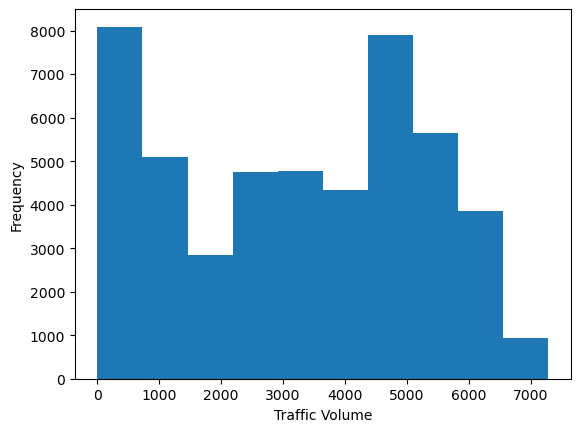

In [4]:
# Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.
# Use Series.describe() to look up a few statistics about the traffic_volume column.
# Note a few observations about the distribution of traffic_volume based on the histogram and the result of Series.describe().


import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

traffic['traffic_volume'].describe()




* Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars.

* We can see through the average Traffic Volume per hours is 3259 cars. 

* About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.


## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
print(type(traffic['date_time'][0]))

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

print(type(traffic['date_time'][0]))

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

traffic.iloc[176:178]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(23877, 9)
(24327, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


This significant difference in row numbers between day, with `23.877` and night, `24.327`, is due to a few hours of missing data. For instance, if you look at rows 176 and 177, you'll notice there's no data for two hours (4 and 5).

## Traffic Volume: Day vs Night (II)

Now we're going to compare the traffic volume at night and during day.


Day:
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Night:
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


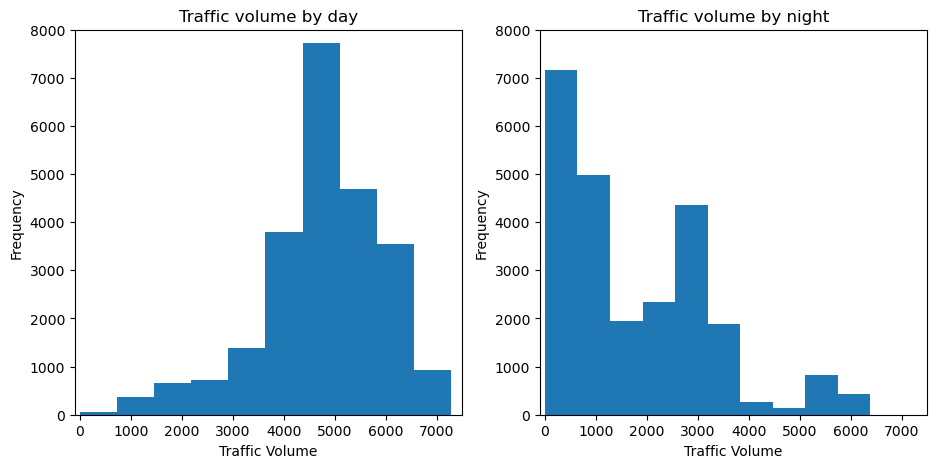

In [20]:
#Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart.

#Figure size in which plots will appear
plt.figure(figsize=(11,5))
#subplot(nrows,ncols,index)
plt.subplot(1,2,1)

plt.hist(day['traffic_volume'])
#Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic volume by day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
#Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic volume by night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

print("Day:\n{}".format(day['traffic_volume'].describe()))

print("\nNight:\n{}".format(night['traffic_volume'].describe()))

* The histogram that shows the distribution of `traffic volume during the day` is **left skewed**. This means that **most of the traffic volume values are high** — there are `4,252` or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

* The histogram displaying the `nighttime` data is right skewed. This means that most of the traffic volume values are low — `75% of the time`, **the number of cars that passed the station each hour was less than 2,819**.

* At `night`, there **rarely is traffic above 4000 cars/hour**, only on very rare ocasions, in which there might be roadworks or acidents.

* Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Daytime: Time Indicators 

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few `line plots` showing **how the traffic volume changed** according to the following parameters:

* Month 
* Day of the week
* Time of day


We'll do the following: 

1. Use `day['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
2. Use `day.groupby('month').mean()` to group the dataset by the month column with the mean as an aggregate function.

In [21]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

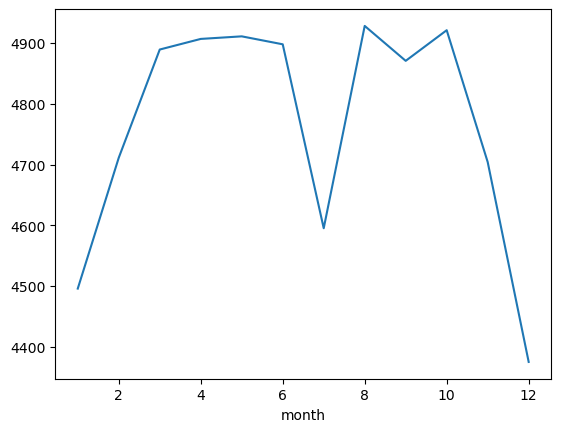

In [27]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.


<AxesSubplot:xlabel='year'>

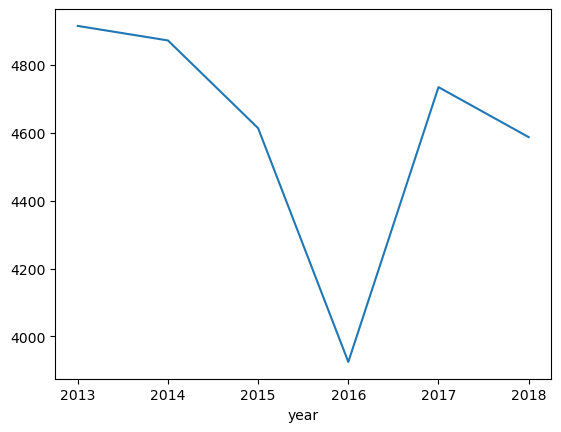

In [35]:
#Add a new column called 'year' to the 'day' DataFrame
day['year'] = day['date_time'].dt.year

only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators: Day of the week

Let's analyse the averages for each day of the week

In [32]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek= day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<AxesSubplot:xlabel='dayofweek'>

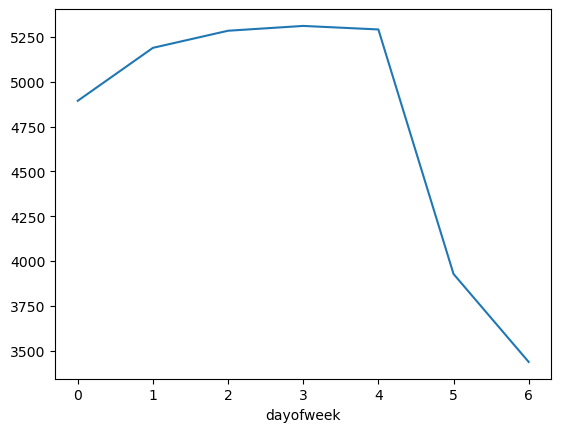

In [33]:
by_dayofweek['traffic_volume'].plot.line()

* From `Monday` to `Friday` we have the highest traffic, **an average mostly above 5000 cars/hour**. `Saturday` and `Sunday` are **much less busy**, with an average below the 4000 cars/hour.

## Time Indicators: Time of the day

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [44]:
#Add a new column called 'hour' to the 'day' DataFrame
day['hour'] = day['date_time'].dt.hour

business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] > 4]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weeked = weekend.groupby('hour').mean()

print("Business:{}".format(by_hour_business['traffic_volume']))

print("Weekend:{}".format(by_hour_weeked['traffic_volume']))

Business:hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Weekend:hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Text(0, 0.5, 'Avg Traffic')

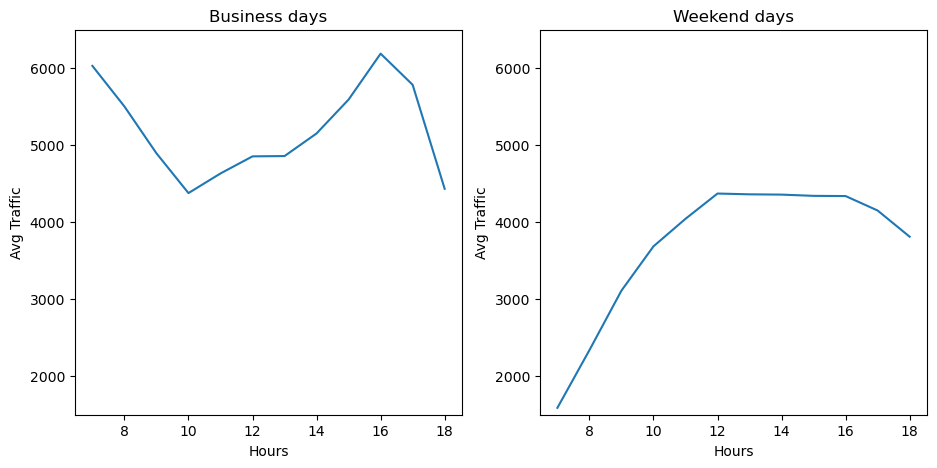

In [52]:
#Figure size in which plots will appear
plt.figure(figsize=(11,5))
#subplot(nrows,ncols,index)
plt.subplot(1,2,1)

by_hour_business['traffic_volume'].plot.line()
plt.title("Business days")
plt.ylim(1500, 6500)
plt.xlabel('Hours')
plt.ylabel("Avg Traffic")


plt.subplot(1,2,2)
by_hour_weeked['traffic_volume'].plot.line()
plt.title("Weekend days")
plt.ylim(1500, 6500)
plt.xlabel('Hours')
plt.ylabel("Avg Traffic")

* The average traffic on any hour of a business day is significantly higher than on the weekends;

* The rush hour on Business days are usually from 07h and 08h AM, and from 16h to 17h. This is the tipical commute from the people to work and coming back home, respectively. 

* On Business days the traffic decreases significantly after the commute to work, although the traffic is still relatively higher than on the weekends;

* On the weekends, people might tend to sleep until later, so until 10am the traffic is relatively light on I-94, with its peak of cars circulating only being reached at around 12h, remaning slightly constant until 16h, where families might go for lunch, shopping, etc. 

**To summarize, we found a few time-related indicators of heavy traffic**:

* The traffic is usually **heavier during warm months** (March–October) compared to cold months (November–February).
* The traffic is usually **heavier on business** days compared to weekends.
* On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [56]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

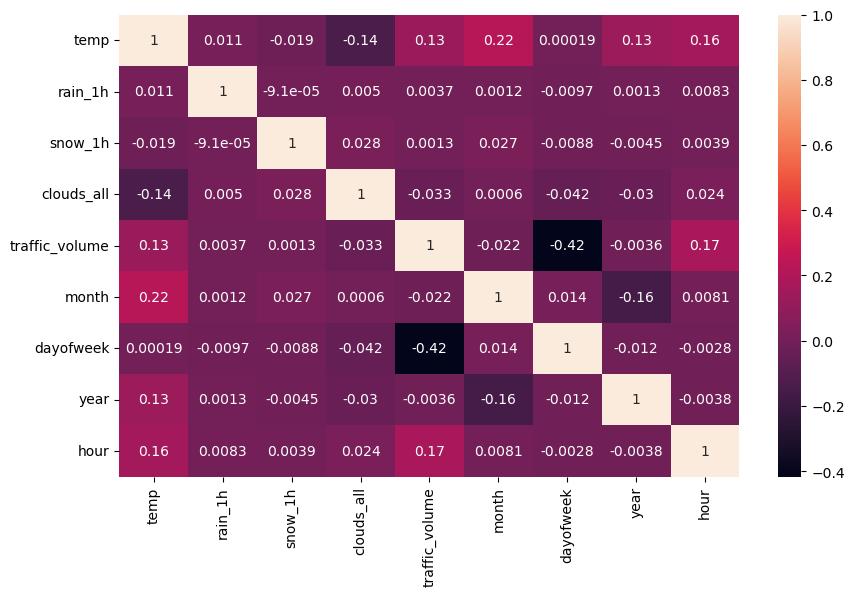

In [74]:
import seaborn as sns

corr = day.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

day.corr()['traffic_volume']

`Temperature` shows the **strongest correlation** with a value of just `+0.13`. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

(230.0, 320.0)

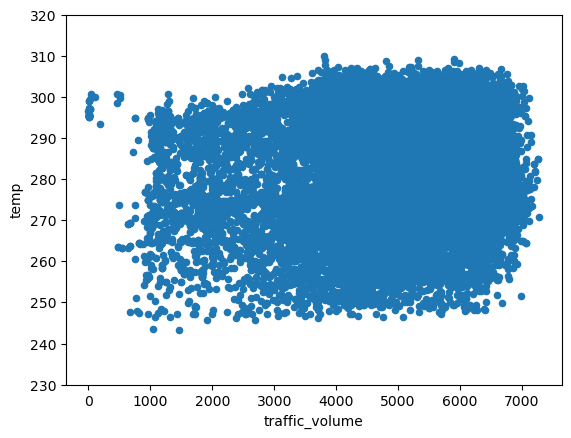

In [79]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320)


We can conclude that **temperature doesn't look like a solid indicator of heavy traffic**.

.

## Weather Types 

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`

In [86]:
print("Weather_main:\n{}".format(day['weather_main'].unique()))

print("Weather_description:\n{}".format(day['weather_description'].unique()))

Weather_main:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Smoke' 'Squall']
Weather_description:
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze'
 'proximity shower rain' 'moderate rain' 'drizzle' 'heavy intensity rain'
 'fog' 'proximity thunderstorm' 'heavy snow' 'snow' 'freezing rain'
 'shower snow' 'light rain and snow' 'light intensity shower rain'
 'thunderstorm with heavy rain' 'thunderstorm with rain'
 'thunderstorm with light rain' 'proximity thunderstorm with rain'
 'heavy intensity drizzle' 'Sky is Clear' 'very heavy rain'
 'proximity thunderstorm with drizzle' 'light snow'
 'thunderstorm with drizzle' 'thunderstorm' 'smoke' 'SQUALLS'
 'light shower snow' 'sleet' 'thunderstorm with light drizzle'
 'shower drizzle']


We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [91]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,year,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,2015.619429,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,2015.321420,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,2015.882220,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,2015.814917,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,2015.557554,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2.895102,2015.527574,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2.914467,2015.572334,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2.416667,2015.916667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2.750344,2015.486245,12.153370


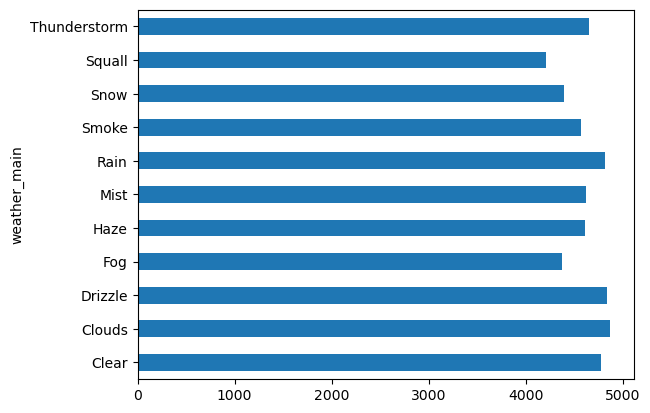

In [98]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Once again, the different **weather conditions don't seem to affect the traffic conditions**, since in all `weather types`, `traffic volume` is similar, around the 4,000 to 5,000 cars, on average.

Let's group by `weather_description`, which has a more granular weather classification.

<AxesSubplot:ylabel='weather_description'>

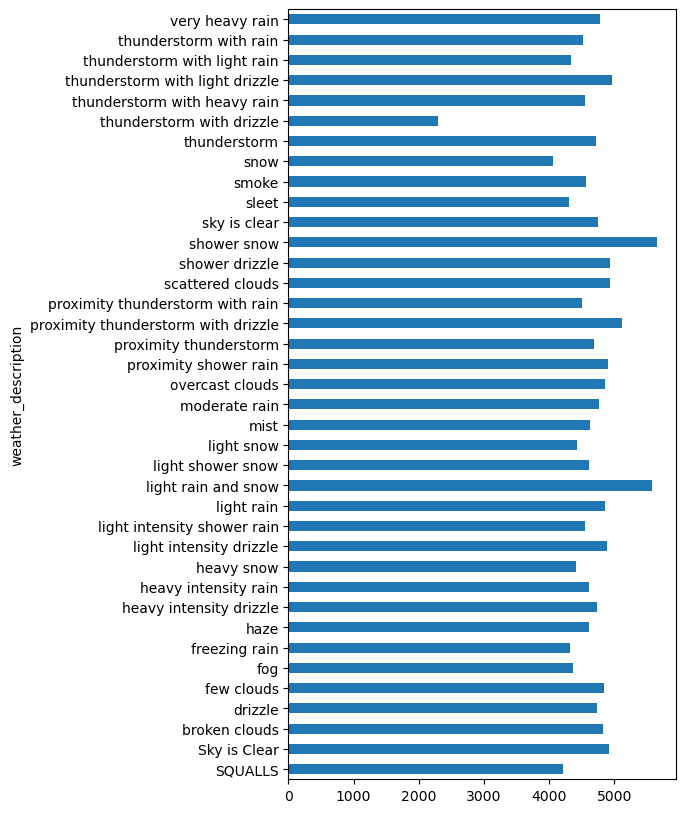

In [109]:
plt.figure(figsize=(5, 10))
by_weather_description['traffic_volume'].plot.barh()

It looks like there are **three weather types where traffic volume exceeds 5,000**:

* `Shower snow`
* `Light rain and snow`
* `Proximity thunderstorm with drizzle`

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**  
  
* The `traffic` is usually **heavier during warm months** (March–October) compared to cold months (November–February).
* The `traffic` is usually **heavier on business days** compared to the weekends.
* On `business days`, the **rush hours are around 7 and 16**.
	
  
**Weather indicators**  

* `Shower snow`
* `Light rain and snow`
* `Proximity thunderstorm with drizzle`

§